# W-band radar example

 During EUREC4A and ATOMIC NOAA deployed W-band (94 GHz) radars on both the P-3 aircraft
 and the ship Ron Brown. The airborne radar was operated with 220 30-meter range gates
 with a dwell time of 0.5 seconds. The minimum detectable reflectivity of -36 dBZ at a range of
 1 km although accurate estimates of Doppler properties require about -30 dBZ at 1 km.

The data are available through the EUREC4A intake catalog.

In [1]:
import datetime

import matplotlib.pyplot as plt
import colorcet as cc
%matplotlib inline

import eurec4a
cat = eurec4a.get_intake_catalog()

We'll select an hour's worth of observations from a single flight day, and mask
out any observations with signal-to-noise ratio less than -10 dB.

In [2]:
time_slice = slice(datetime.datetime(2020, 1, 19, hour=18),
                   datetime.datetime(2020, 1, 19, hour=19))

cloud_params = cat.P3.remote_sensing['P3-0119'].to_dask().sel(time=time_slice)

w_band         = cat.P3.w_band_radar['P3-0119'].to_dask().sel(time=time_slice, height=slice(0,3))
w_band         = w_band.where(w_band.snr > -10)

The three main quantities measured by the radar are the reflectivity, the Doppler
velocity, and the spectral width.

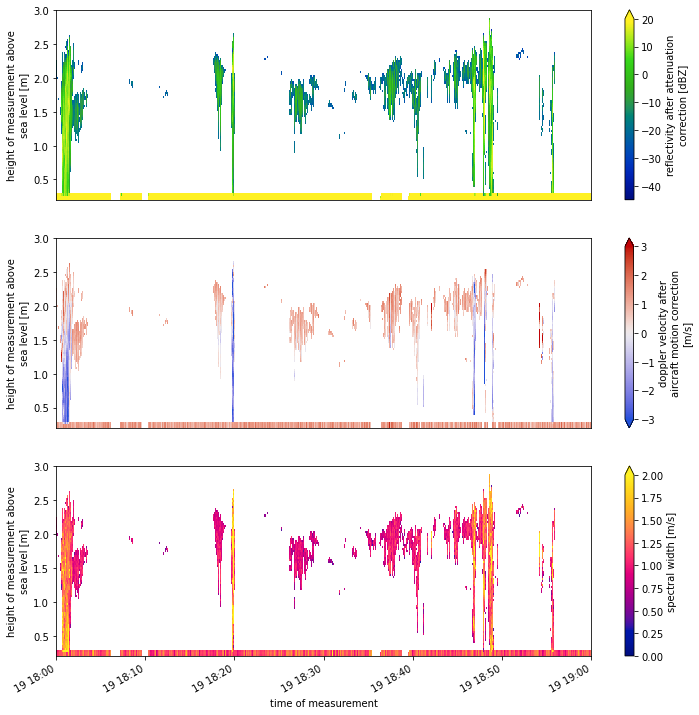

In [3]:
fig = plt.figure(figsize = (12,10.2))

axes = fig.subplots(3, 1, sharex=True)
w_band.corrected_reflectivity.plot(x="time", y="height",
                                   ax = axes[0],
                                   vmin = -45, vmax = 20,
                                   cmap = cc.m_bgy)
w_band.corrected_doppler_velocity.plot(x="time", y="height",
                                       ax = axes[1],
                                       vmin = -3, vmax = 3,
                                       cmap = cc.m_coolwarm)

w_band.spectral_width.plot(x="time", y="height",
                          ax = axes[2],
                          vmin = 0, vmax = 2,
                          cmap = cc.m_bmy)

for ax in axes[0:2]:
    ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
    ax.xaxis.set_visible(False)

fig.subplots_adjust(bottom = 0)